In [288]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.cuda.is_available()
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [289]:
# define the 1st model
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()        
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 = nn.Linear(10, 10)
        self.fc6 = nn.Linear(10, 10)
        self.fc7 = nn.Linear(10, 5)
        self.fc8 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = self.fc8(x)
        return x
    
# define the 2st model
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()        
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 18)
        self.fc3 = nn.Linear(18, 15)
        self.fc4 = nn.Linear(15, 4)
        self.fc5 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# define the 3st model
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()        
        self.fc1 = nn.Linear(1, 190)
        self.fc2 = nn.Linear(190, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    



In [290]:
# define the 1st function
def func1(x):
    return np.sin(5 * np.pi * x) / (5 * np.pi * x)

# define the 2nd function
def func2(x):
    return np.sign(np.sin(5*np.pi*x))

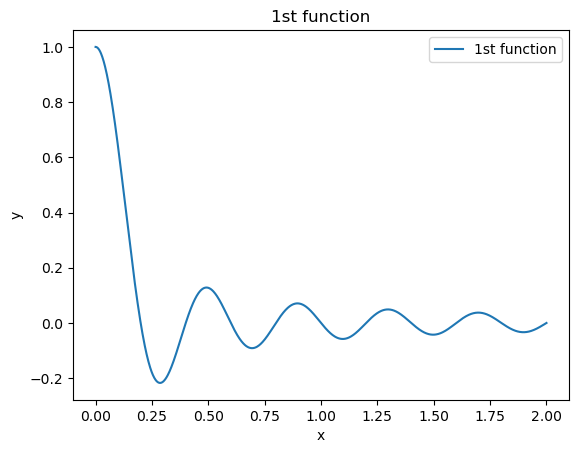

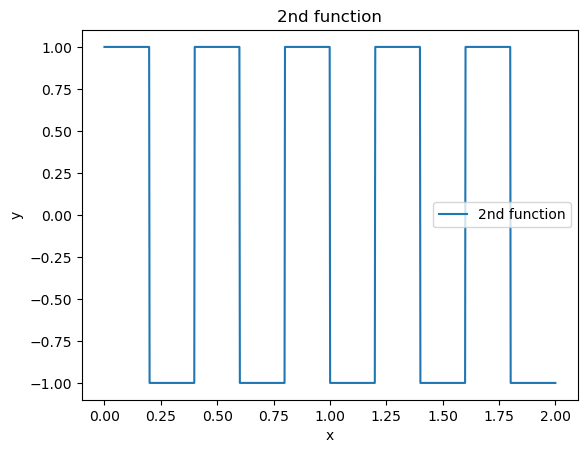

In [291]:
# define the training data and plot
x = np.linspace(2e-6, 2.0, 1000)
y1 = func1(x)
y2 = func2(x)

plt.figure()
plt.plot(x, y1, label='1st function')
plt.title('1st function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, y2, label='2nd function')
plt.title('2nd function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [292]:
# define the training function
def train_model(model, x_train, y_train, epochs=100, lr=0.01):

    losses = []  


    x_train_tensor = torch.tensor(x_train, dtype=torch.float32, device=device).view(-1, 1) 
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)
    


    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        outputs = model(x_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item()) 

        if (epoch+1) % 1000 == 0:

            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    print('Finished Training')

    return losses

Epoch [1000/20000], Loss: 0.0015
Epoch [2000/20000], Loss: 0.0012
Epoch [3000/20000], Loss: 0.0005
Epoch [4000/20000], Loss: 0.0003
Epoch [5000/20000], Loss: 0.0003
Epoch [6000/20000], Loss: 0.0003
Epoch [7000/20000], Loss: 0.0002
Epoch [8000/20000], Loss: 0.0002
Epoch [9000/20000], Loss: 0.0001
Epoch [10000/20000], Loss: 0.0001
Epoch [11000/20000], Loss: 0.0001
Epoch [12000/20000], Loss: 0.0001
Epoch [13000/20000], Loss: 0.0001
Epoch [14000/20000], Loss: 0.0001
Epoch [15000/20000], Loss: 0.0001
Epoch [16000/20000], Loss: 0.0001
Epoch [17000/20000], Loss: 0.0000
Epoch [18000/20000], Loss: 0.0000
Epoch [19000/20000], Loss: 0.0000
Epoch [20000/20000], Loss: 0.0000
Finished Training
Epoch [1000/20000], Loss: 0.0071
Epoch [2000/20000], Loss: 0.0027
Epoch [3000/20000], Loss: 0.0020
Epoch [4000/20000], Loss: 0.0019
Epoch [5000/20000], Loss: 0.0019
Epoch [6000/20000], Loss: 0.0019
Epoch [7000/20000], Loss: 0.0019
Epoch [8000/20000], Loss: 0.0019
Epoch [9000/20000], Loss: 0.0019
Epoch [10000/2

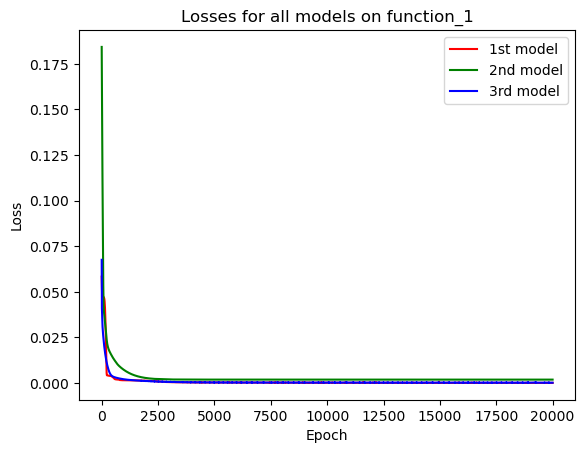

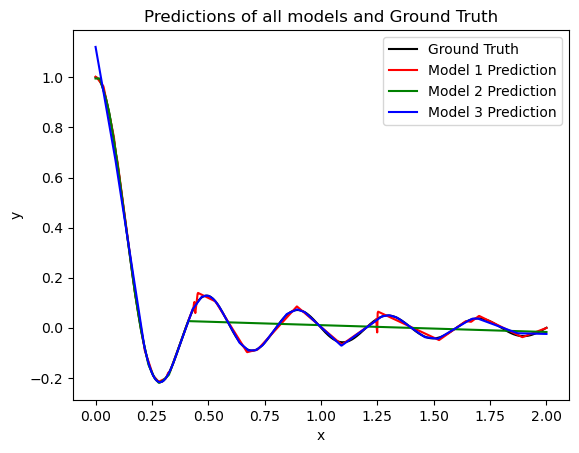

In [293]:
# train the models on function 1
# model_function

model_1_1 = Model_1()
model_2_1 = Model_2()
model_3_1 = Model_3()

model_1_1.to(device)
model_2_1.to(device)
model_3_1.to(device)


num_epochs = 20000
losses_1_1= train_model(model_1_1, x, y1, epochs=num_epochs, lr=0.001)
losses_2_1= train_model(model_2_1, x, y1, epochs=num_epochs, lr=0.001)
losses_3_1 = train_model(model_3_1, x, y1, epochs=num_epochs, lr=0.001)


plt.plot(losses_1_1, label='1st model', color = "r")
plt.plot(losses_2_1, label='2nd model', color = "g")
plt.plot(losses_3_1, label='3rd model', color = "b")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses for all models on function_1')
plt.legend()
plt.show()


predictions_1_1 = model_1_1(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_2_1 = model_2_1(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_3_1 = model_3_1(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()


plt.figure()
plt.plot(x, y1, label='Ground Truth', color='black')
plt.plot(x, predictions_1_1, label='Model 1 Prediction', color='r')
plt.plot(x, predictions_2_1, label='Model 2 Prediction', color='g')
plt.plot(x, predictions_3_1, label='Model 3 Prediction', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions of all models and Ground Truth')
plt.legend()
plt.show()


Epoch [1000/20000], Loss: 0.0016
Epoch [2000/20000], Loss: 0.0016
Epoch [3000/20000], Loss: 0.0016
Epoch [4000/20000], Loss: 0.0016
Epoch [5000/20000], Loss: 0.0016
Epoch [6000/20000], Loss: 0.0016
Epoch [7000/20000], Loss: 0.0018
Epoch [8000/20000], Loss: 0.0016
Epoch [9000/20000], Loss: 0.0016
Epoch [10000/20000], Loss: 0.0015
Epoch [11000/20000], Loss: 0.0015
Epoch [12000/20000], Loss: 0.0006
Epoch [13000/20000], Loss: 0.0001
Epoch [14000/20000], Loss: 0.0001
Epoch [15000/20000], Loss: 0.0001
Epoch [16000/20000], Loss: 0.0001
Epoch [17000/20000], Loss: 0.0001
Epoch [18000/20000], Loss: 0.0001
Epoch [19000/20000], Loss: 0.0000
Epoch [20000/20000], Loss: 0.0000
Finished Training
Epoch [1000/20000], Loss: 0.0019
Epoch [2000/20000], Loss: 0.0019
Epoch [3000/20000], Loss: 0.0019
Epoch [4000/20000], Loss: 0.0019
Epoch [5000/20000], Loss: 0.0019
Epoch [6000/20000], Loss: 0.0019
Epoch [7000/20000], Loss: 0.0010
Epoch [8000/20000], Loss: 0.0009
Epoch [9000/20000], Loss: 0.0010
Epoch [10000/2

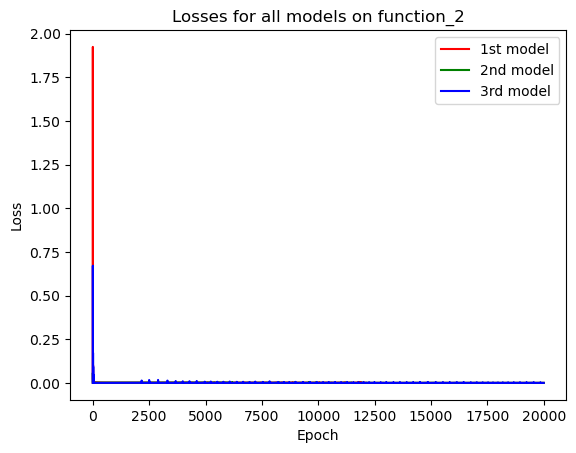

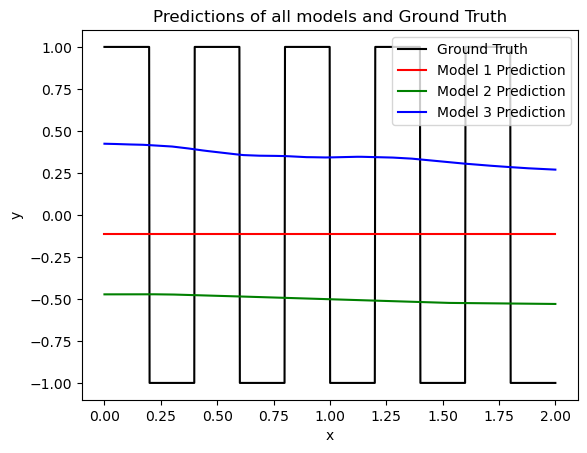

In [294]:
# train the models on function 2

model_1_2 = Model_1()
model_2_2 = Model_2()
model_3_2 = Model_3()

model_1_2.to(device)
model_2_2.to(device)
model_3_2.to(device)

losses_1_2= train_model(model_1_1, x, y1, epochs=num_epochs, lr=0.01)
losses_2_2= train_model(model_2_1, x, y1, epochs=num_epochs, lr=0.01)
losses_3_2 = train_model(model_3_1, x, y1, epochs=num_epochs, lr=0.01)


plt.plot(losses_1_2, label='1st model', color = "r")
plt.plot(losses_2_2, label='2nd model', color = "g")
plt.plot(losses_3_2, label='3rd model', color = "b")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses for all models on function_2')
plt.legend()
plt.show()


predictions_1_2 = model_1_2(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_2_2 = model_2_2(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()
predictions_3_2 = model_3_2(torch.tensor(x, dtype=torch.float32, device=device).view(-1, 1)).detach().cpu().numpy()


plt.figure()
plt.plot(x, y2, label='Ground Truth', color='black')
plt.plot(x, predictions_1_2, label='Model 1 Prediction', color='r')
plt.plot(x, predictions_2_2, label='Model 2 Prediction', color='g')
plt.plot(x, predictions_3_2, label='Model 3 Prediction', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions of all models and Ground Truth')
plt.legend()
plt.show()


In [295]:
from torchsummary import summary
summary(model_1_1, input_size=(1000,1))
summary(model_2_1, input_size=(1000,1))
summary(model_3_1, input_size=(1000,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1000, 5]              10
            Linear-2             [-1, 1000, 10]              60
            Linear-3             [-1, 1000, 10]             110
            Linear-4             [-1, 1000, 10]             110
            Linear-5             [-1, 1000, 10]             110
            Linear-6             [-1, 1000, 10]             110
            Linear-7              [-1, 1000, 5]              55
            Linear-8              [-1, 1000, 1]               6
Total params: 571
Trainable params: 571
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.47
Params size (MB): 0.00
Estimated Total Size (MB): 0.47
----------------------------------------------------------------
--------------------------------------------------

In [296]:
# def the cnn model 
from torchvision.datasets import MNIST, CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

class CNN(nn.Module):
    def __init__(self, num_hidden_layers=2, hidden_dim=64, dataset='mnist'):
        super(CNN, self).__init__()

        if dataset == 'mnist':
            num_channels = 1
            num_classes = 10
            input_size = 28  
        if dataset == 'cifar':
            num_channels = 3
            num_classes = 10
            input_size = 32  

        self.conv1 = nn.Conv2d(num_channels, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        self.hidden_layers = nn.ModuleList([
            nn.Conv2d(16, hidden_dim, kernel_size=3, stride=1, padding=1)
        ])
        for _ in range(num_hidden_layers - 1):
            self.hidden_layers.append(nn.Conv2d(hidden_dim, hidden_dim, kernel_size=3, stride=1, padding=1))

        self.fc = nn.Linear(hidden_dim * (input_size // 2) * (input_size // 2), num_classes)  

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        
        for layer in self.hidden_layers:
            x = F.relu(layer(x))

        x = torch.flatten(x, 1) 
        x = self.fc(x)
        return x





In [297]:
model_1_minist = CNN(num_hidden_layers=1, hidden_dim=16, dataset='mnist')
model_2_minist = CNN(num_hidden_layers=1, hidden_dim=28, dataset='mnist')
model_3_minist = CNN(num_hidden_layers=1, hidden_dim=44, dataset='mnist')
model_4_minist = CNN(num_hidden_layers=2, hidden_dim=16, dataset='mnist')
model_5_minist = CNN(num_hidden_layers=4, hidden_dim=16, dataset='mnist')

model_1_minist.to(device)
model_2_minist.to(device)
model_3_minist.to(device)
model_4_minist.to(device)
model_5_minist.to(device)


transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,))  
])

def get_dataset(dataset_name):
    if dataset_name == 'mnist':
        dataset = MNIST(root='./data', train=True, download=True, transform=transform)
    if dataset_name == 'cifar':
        dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
    return dataset

def get_dataloader(dataset_name, batch_size=64, shuffle=True):
    dataset = get_dataset(dataset_name)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader

train_loader_mnist = get_dataloader('mnist', batch_size=128, shuffle=True)
test_loader_mnist = get_dataloader('mnist', batch_size=128, shuffle=False)


def eval(model, test_loader, device):
    model.eval()  
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return correct / total


def train(model, train_loader, test_loader, device, lr=0.001, epochs=100):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    epoch_losses = []  
    epoch_accuracies = []  

    for epoch in range(epochs):
        model.train()  
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  

            outputs = model(inputs)  
            loss = criterion(outputs, labels)  
            loss.backward()  
            optimizer.step() 

        epoch_losses.append(loss.item())  

        epoch_accuracy = eval(model, test_loader, device)
        epoch_accuracies.append(epoch_accuracy)

        print(f'Epoch [{epoch+1}/{epochs}],Loss: {loss.item():.4f} Accuracy: {epoch_accuracy:.4f}')

    print('Finished Training')
    
    return epoch_losses, epoch_accuracies




In [298]:
losses_1_minist, accuracies_1_minist = train(model_1_minist, train_loader_mnist, test_loader_mnist, device, lr=0.001, epochs=50)
losses_2_minist, accuracies_2_minist = train(model_2_minist, train_loader_mnist,test_loader_mnist, device, lr=0.001, epochs=50)
losses_3_minist, accuracies_3_minist = train(model_3_minist, train_loader_mnist,test_loader_mnist,  device, lr=0.001, epochs=50)
losses_4_minist, accuracies_4_minist = train(model_4_minist, train_loader_mnist, test_loader_mnist, device, lr=0.001, epochs=50)
losses_5_minist, accuracies_5_minist = train(model_5_minist, train_loader_mnist, test_loader_mnist, device, lr=0.001, epochs=50)

Epoch [1/50],Loss: 0.0918 Accuracy: 0.9683
Epoch [2/50],Loss: 0.1696 Accuracy: 0.9836
Epoch [3/50],Loss: 0.0888 Accuracy: 0.9874
Epoch [4/50],Loss: 0.0378 Accuracy: 0.9860
Epoch [5/50],Loss: 0.0132 Accuracy: 0.9891
Epoch [6/50],Loss: 0.0703 Accuracy: 0.9923
Epoch [7/50],Loss: 0.0033 Accuracy: 0.9935
Epoch [8/50],Loss: 0.0024 Accuracy: 0.9944
Epoch [9/50],Loss: 0.0148 Accuracy: 0.9947
Epoch [10/50],Loss: 0.0321 Accuracy: 0.9959
Epoch [11/50],Loss: 0.0165 Accuracy: 0.9954
Epoch [12/50],Loss: 0.0018 Accuracy: 0.9966
Epoch [13/50],Loss: 0.0307 Accuracy: 0.9968
Epoch [14/50],Loss: 0.0144 Accuracy: 0.9972
Epoch [15/50],Loss: 0.0547 Accuracy: 0.9964
Epoch [16/50],Loss: 0.0031 Accuracy: 0.9982
Epoch [17/50],Loss: 0.0043 Accuracy: 0.9990
Epoch [18/50],Loss: 0.0003 Accuracy: 0.9982
Epoch [19/50],Loss: 0.0016 Accuracy: 0.9990
Epoch [20/50],Loss: 0.0031 Accuracy: 0.9979
Epoch [21/50],Loss: 0.0006 Accuracy: 0.9989
Epoch [22/50],Loss: 0.0005 Accuracy: 0.9987
Epoch [23/50],Loss: 0.0085 Accuracy: 0.99

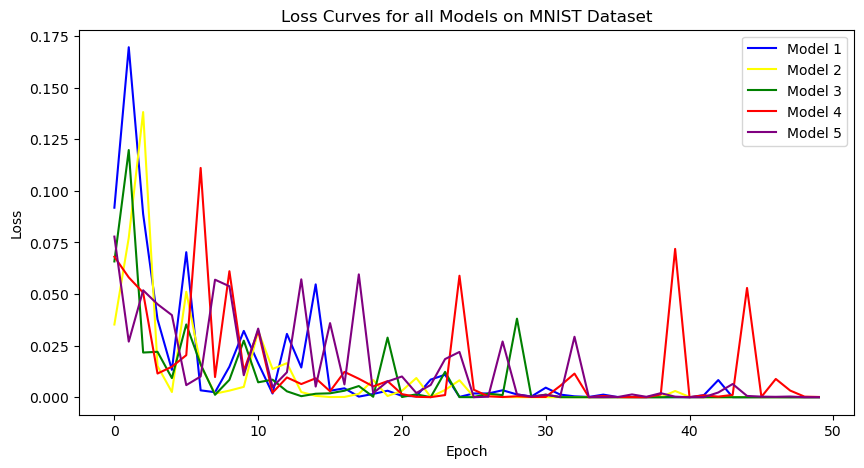

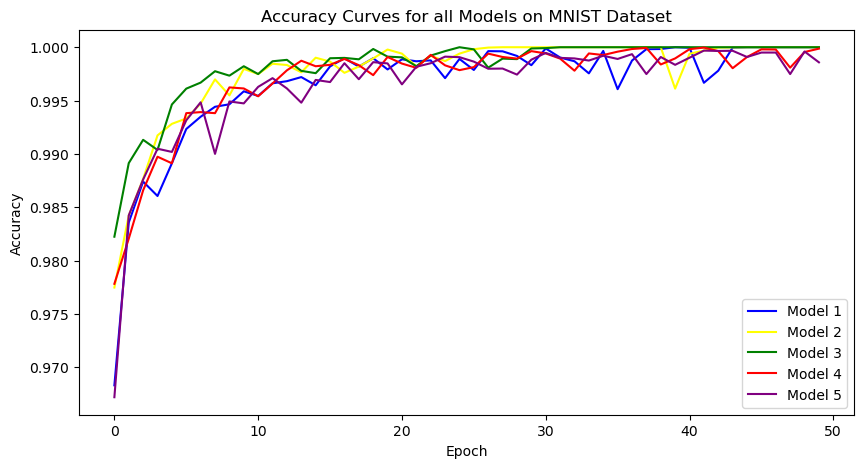

In [299]:

plt.figure(figsize=(10, 5))
plt.title('Loss Curves for all Models on MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(losses_1_minist, label='Model 1', color='blue')
plt.plot(losses_2_minist, label='Model 2', color='yellow')
plt.plot(losses_3_minist, label='Model 3', color='green')
plt.plot(losses_4_minist, label='Model 4', color='red')
plt.plot(losses_5_minist, label='Model 5', color='purple')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Accuracy Curves for all Models on MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(accuracies_1_minist, label='Model 1', color='blue')
plt.plot(accuracies_2_minist, label='Model 2', color='yellow')
plt.plot(accuracies_3_minist, label='Model 3', color='green')
plt.plot(accuracies_4_minist, label='Model 4', color='red')
plt.plot(accuracies_5_minist, label='Model 5', color='purple')

plt.legend()
plt.show()

In [300]:
model_1_cifar = CNN(num_hidden_layers=1, hidden_dim=16, dataset='cifar')
model_2_cifar = CNN(num_hidden_layers=1, hidden_dim=28, dataset='cifar')
model_3_cifar = CNN(num_hidden_layers=1, hidden_dim=44, dataset='cifar')
model_4_cifar = CNN(num_hidden_layers=2, hidden_dim=16, dataset='cifar')
model_5_cifar = CNN(num_hidden_layers=4, hidden_dim=16, dataset='cifar')

model_1_cifar.to(device)
model_2_cifar.to(device)
model_3_cifar.to(device)
model_4_cifar.to(device)
model_5_cifar.to(device)

train_loader_cifar = get_dataloader('cifar', batch_size=128, shuffle=True)
test_loader_cifar = get_dataloader('cifar', batch_size=128, shuffle=False)

losses_1_cifar, accuracies_1_cifar = train(model_1_cifar, train_loader_cifar, test_loader_cifar, device, lr=0.001, epochs=100)
losses_2_cifar, accuracies_2_cifar = train(model_2_cifar, train_loader_cifar,test_loader_cifar, device, lr=0.001, epochs=100)
losses_3_cifar, accuracies_3_cifar = train(model_3_cifar, train_loader_cifar,test_loader_cifar,  device, lr=0.001, epochs=100)
losses_4_cifar, accuracies_4_cifar = train(model_4_cifar, train_loader_cifar, test_loader_cifar, device, lr=0.001, epochs=100)
losses_5_cifar, accuracies_5_cifar = train(model_5_cifar, train_loader_cifar, test_loader_cifar, device, lr=0.001, epochs=100)

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/100],Loss: 1.2151 Accuracy: 0.5585
Epoch [2/100],Loss: 1.0767 Accuracy: 0.5995
Epoch [3/100],Loss: 1.3089 Accuracy: 0.6354
Epoch [4/100],Loss: 1.0582 Accuracy: 0.6558
Epoch [5/100],Loss: 1.1222 Accuracy: 0.6702
Epoch [6/100],Loss: 1.0236 Accuracy: 0.6751
Epoch [7/100],Loss: 0.7699 Accuracy: 0.6999
Epoch [8/100],Loss: 1.0509 Accuracy: 0.7108
Epoch [9/100],Loss: 0.8209 Accuracy: 0.7142
Epoch [10/100],Loss: 0.9504 Accuracy: 0.7246
Epoch [11/100],Loss: 0.9962 Accuracy: 0.7339
Epoch [12/100],Loss: 0.7421 Accuracy: 0.7411
Epoch [13/100],Loss: 0.7879 Accuracy: 0.7269
Epoch [14/100],Loss: 0.7734 Accuracy: 0.7609
Epoch [15/100],Loss: 0.6157 Accuracy: 0.7550
Epoch [16/100],Loss: 0.7509 Accuracy: 0.7663
Epoch [17/100],Loss: 0.8505 Accuracy: 0.7725
Epoch [18/100],Loss: 0.7699 Accuracy: 0.7769
Epoch [19/100],Loss: 0.9222 Accuracy: 0.7790
Epoch [20/100],Loss: 0.8960 Accuracy: 0.7866
Epoch [21/100],Loss: 0.8411 Accur

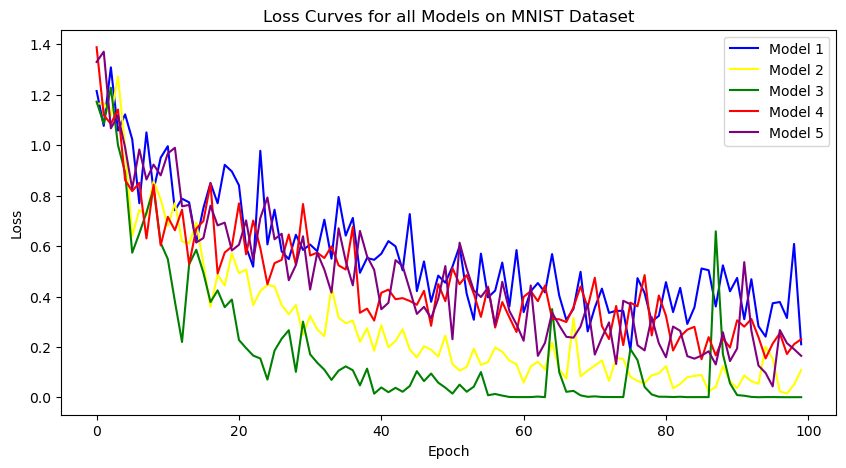

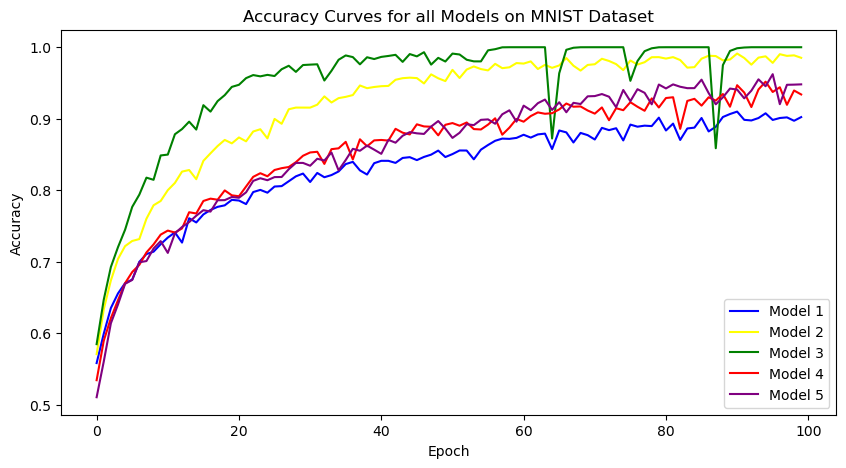

In [301]:

plt.figure(figsize=(10, 5))
plt.title('Loss Curves for all Models on MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(losses_1_cifar, label='Model 1', color='blue')
plt.plot(losses_2_cifar, label='Model 2', color='yellow')
plt.plot(losses_3_cifar, label='Model 3', color='green')
plt.plot(losses_4_cifar, label='Model 4', color='red')
plt.plot(losses_5_cifar, label='Model 5', color='purple')

plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Accuracy Curves for all Models on MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(accuracies_1_cifar, label='Model 1', color='blue')
plt.plot(accuracies_2_cifar, label='Model 2', color='yellow')
plt.plot(accuracies_3_cifar, label='Model 3', color='green')
plt.plot(accuracies_4_cifar, label='Model 4', color='red')
plt.plot(accuracies_5_cifar, label='Model 5', color='purple')

plt.legend()
plt.show()

In [302]:
summary(model_1_minist, input_size=(1,28,28))
summary(model_2_minist, input_size=(1,28,28))
summary(model_3_minist, input_size=(1,28,28))
summary(model_4_minist, input_size=(1,28,28))
summary(model_5_minist, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 16, 14, 14]           2,320
            Linear-4                   [-1, 10]          31,370
Total params: 33,850
Trainable params: 33,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.13
Estimated Total Size (MB): 0.28
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 28, 14,

In [303]:
summary(model_1_cifar, input_size=(3,32,32))
summary(model_2_cifar, input_size=(3,32,32))
summary(model_3_cifar, input_size=(3,32,32))
summary(model_4_cifar, input_size=(3,32,32))
summary(model_5_cifar, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 16, 16, 16]           2,320
            Linear-4                   [-1, 10]          40,970
Total params: 43,738
Trainable params: 43,738
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 0.17
Estimated Total Size (MB): 0.37
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 28, 16,